<a href="https://colab.research.google.com/github/SwadhiRSSRS/Computer-Vision-and-its-Applications/blob/main/CVA%20EX%208/AI19641_CVA_EX_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX 8

A PyTorch implementation of Object Detection with Single Shot Detector

In [ ]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the SSD model using torchvision.models.detection.ssdlite320_mobilenet_v3_large
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)

# Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth
100%|██████████| 13.4M/13.4M [00:00<00:00, 70.1MB/s]


SSD(
  (backbone): SSDLiteFeatureExtractorMobileNet(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (2): Hardswish()
        )
        (1): InvertedResidual(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
            (1): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
        (2): Invert

In [ ]:
# Define the COCO class names
coco_classes = [
'__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
'toothbrush'
]

In [ ]:
# Load an example image
image_path = '/content/images.jpg'
image = Image.open(image_path)
# Convert the image to a tensor
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [ ]:
image_tensor = image_tensor.unsqueeze(0)
# Pass the image tensor through the model to get the predictions
with torch.no_grad():
  output = model(image_tensor)

In [ ]:
# Get the predicted bounding boxes, scores, and labels
boxes = output[0]['boxes'].detach().cpu().numpy()
scores = output[0]['scores'].detach().cpu().numpy()
labels = output[0]['labels'].detach().cpu().numpy()

In [ ]:
# Print the predicted labels and scores for each object
for box, score, label in zip(boxes, scores, labels):
  if score > 0.5:
    print(coco_classes[label], score)

person 0.81214714
person 0.7802589
car 0.63875604
car 0.61136776


person 0.81214714
person 0.7802589
car 0.63875604
car 0.61136776


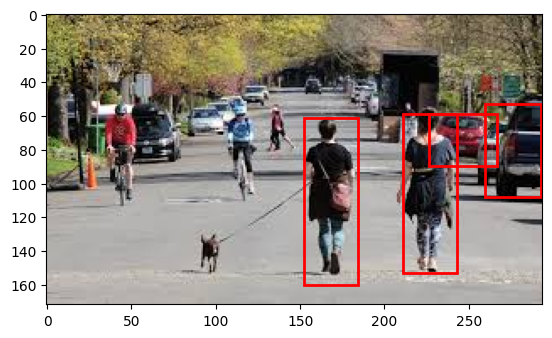

In [ ]:
# Draw the predicted bounding boxes on the image
fig, ax = plt.subplots(1)
ax.imshow(image)
for box, score, label in zip(boxes, scores, labels):
  if score > 0.5:
    box = box.tolist()
    print(coco_classes[label], score)
    ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],fill=False, edgecolor='red', linewidth=2))
plt.show()